# Summary:
## There are several visitors comes to Taiwan in every year before 2020.
## And they have different reasons to come like because of business or
## pleasure etc.
## In this project, I get the data from Kaggle. 
## The data are about visitors from different place that come to Taiwan
## with different purpose from 2011-01 to 2018-09.
## I want to find the relation between the five region of visitors and their purpose.
## And use visalization to compare data we want
# --------------------

# Object:
## -Find how many people go to Taiwan from different region. 
## -Find the main purpose of the visitors from different five region.
## -Use bar chart to compare region to total visitors and the purpose
# --------------------


# Import Data

In [5]:
#Import tool
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
#Import the data that download from kaggle
df = pd.read_csv("purpose.csv")
df

,Residence,Region,Sub-Region,Period,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated
0,Unstated,NaN,NaN,2011-01,1,2,2,0,0,0,0,14,2474
1,France,Europe,NaN,2011-01,1003,337,474,22,99,0,0,123,55
2,Germany,Europe,NaN,2011-01,1835,511,627,46,62,0,0,129,151
3,Italy,Europe,NaN,2011-01,517,144,137,26,10,0,0,56,43
4,Netherlands,Europe,NaN,2011-01,531,278,211,11,15,0,0,61,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,Netherlands,Europe,NaN,2018-09,794,692,68,38,92,10,2,288,0
3611,Italy,Europe,NaN,2018-09,645,303,59,46,89,22,0,331,0
3612,Germany,Europe,NaN,2018-09,1867,2190,255,86,358,30,1,855,0
3613,Belgium,Europe,NaN,2018-09,219,220,43,23,76,7,2,109,0



# Get the sum of numbers every row 

In [16]:
#Drop the index that the 'Region' is 'NaN'.
df2=df.dropna(axis='index',subset=['Region'])

#The types of purpose in this data
purpose=list(df2.columns[4:])

#Sum up numbers of every types of purposes in every row.
t=0
for i in purpose:
    t+=df2[i]
print(t)

#Add the total into the dataframe
total = pd.DataFrame({'Total': t})
df2=df2.join(total)
df2


1         2113
2         3361
3          933
4         1139
5          490
         ...  
3610      1984
3611      1495
3612      5642
3613       699
3614    218125
Name: Business, Length: 3522, dtype: int64


,Residence,Region,Sub-Region,Period,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total
1,France,Europe,NaN,2011-01,1003,337,474,22,99,0,0,123,55,2113
2,Germany,Europe,NaN,2011-01,1835,511,627,46,62,0,0,129,151,3361
3,Italy,Europe,NaN,2011-01,517,144,137,26,10,0,0,56,43,933
4,Netherlands,Europe,NaN,2011-01,531,278,211,11,15,0,0,61,32,1139
5,Switzerland,Europe,NaN,2011-01,228,114,108,5,4,0,0,19,12,490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,Netherlands,Europe,NaN,2018-09,794,692,68,38,92,10,2,288,0,1984
3611,Italy,Europe,NaN,2018-09,645,303,59,46,89,22,0,331,0,1495
3612,Germany,Europe,NaN,2018-09,1867,2190,255,86,358,30,1,855,0,5642
3613,Belgium,Europe,NaN,2018-09,219,220,43,23,76,7,2,109,0,699



# Get the data we want

In [18]:
#Use groupby function to sum up all purposes related to different regions.
df3=df2.groupby("Region").sum()
df3

,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total
Region,,,,,,,,,,
Africa,23746,9127,8858,3828,3464,1237,87,27317,162,77826
America,956574,1481947,1267757,62376,49347,6995,3030,681391,5020,4514437
Asia,4596751,46586298,1872493,375475,402709,75259,373490,9146914,206716,63636105
Europe,675713,644181,180674,49541,60047,16377,679,438959,2097,2068268
Oceania,100516,322098,124952,18446,5130,3110,2899,116558,602,694311



# Draw the chart about total visitors from different region

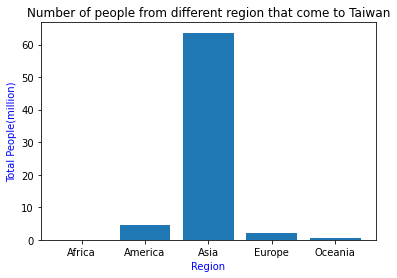

In [20]:
#Draw the bar chart about total visitors related to regions.
X=df3.index
Y=df3['Total']/10**6
plt.bar(X,Y)
#Set axis and title.
plt.xlabel('Region',color='blue')
plt.ylabel('Total People(million)',color='blue')
plt.title('Number of people from different region that come to Taiwan')
#Show plot.
plt.show()

# --------------------
# Conclusion 1

### -Amounts of visitors:Asia>America>Europe>Oceania>Africa
### -Visitors from Asia are way more than others
### -Visitors from Africa are way fewer than others
# --------------------


# See about what's the main purpose of the visitors from different region

<Figure size 432x288 with 0 Axes>

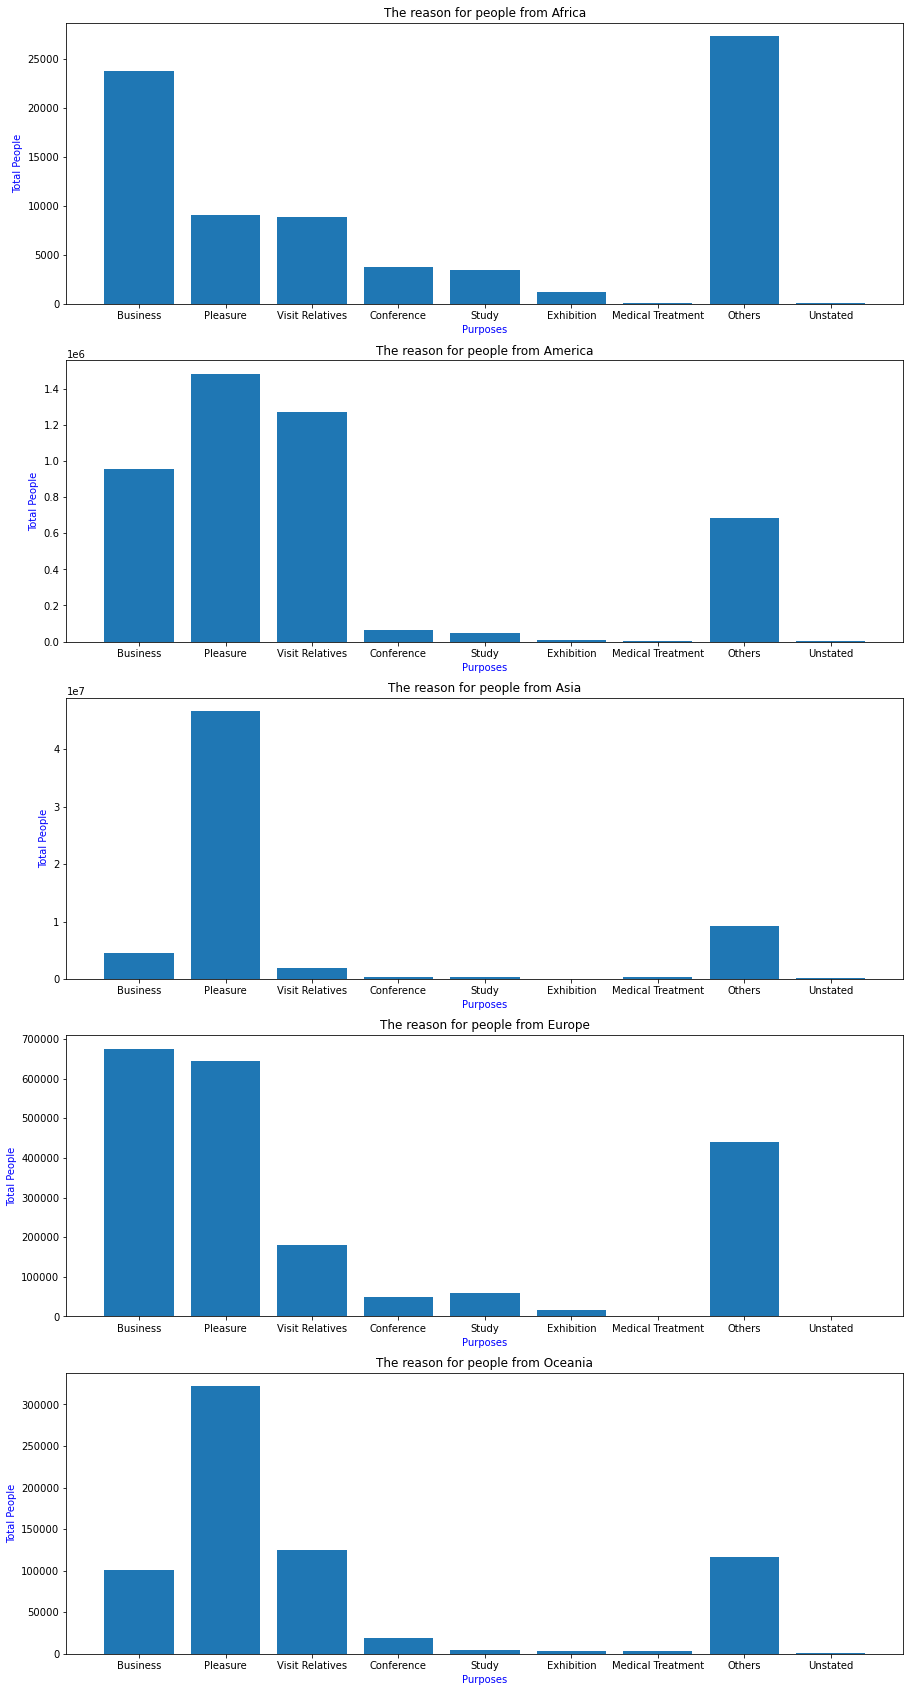

In [56]:
#List of five Regions.
Region_list=list(df3.index)

#Make the bar charts of purpose related to people of all regions.
#Adjust the plot size.
fig = plt.figure()
f, ax = plt.subplots(5,1,figsize=(15,30))
#Draw plots for each region.
X=purpose
for i in range(len(Region_list)):
    Y=df3[df3.index==Region_list[i]].values[0][:9]
    plt.subplot(5,1,i+1)
    plt.bar(X,Y)
    #Set axis and title.
    plt.title('The reason for people from '+Region_list[i])
    plt.xlabel('Purposes',color='blue')
    plt.ylabel('Total People',color='blue')
#Show plot
plt.show()

# --------------------
# Conclusion 2

## Main purpose of every region:
### Africa: 'Business' and other reasons
### America: 'Pleasure' and 'visit relatives'
### Asia: mainly 'Pleasure'
### Europe: 'Business' and 'Pleasure'
### Oceania: mainly 'Pleasure'
# --------------------